# Which arguments influence on World Happiness

## 1. Problem Definition

세계 행복 수준에 영향을 미치는 요인들은 어떤 것들이 있으며, 나아가 이들이 문화와 어떤 방식으로 연관되는지 분석한다.

## 2. Hypothesis Set

집단주의 문화와 개인주의 문화를 결정하는 사회적 요인들이 행복 수준의 지표의 중심이 될 것이다. 
이 때 개인주의적 문화를 이루는 북유럽의 사회민주주의 국가들의 행복 수준이 상대적으로 높을 것이다.

## 3. Get data

In [125]:
#kaggle에서 API로 데이터셋 다운로드하기
! kaggle datasets download -d ajaypalsinghlo/world-happiness-report-2021

world-happiness-report-2021.zip: Skipping, found more recently modified local copy (use --force to force download)


In [126]:
#다운로드한 데이터셋 ZIP파일 압축 풀어 happiness_data 파일 경로에 저장
! tar xvf world-happiness-report-2021.zip -C happiness_data

x world-happiness-report-2021.csv
x world-happiness-report.csv


## 4. Load Data

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
#csv파일 불러오고 상단 5개 데이터 보기
df = pd.read_csv('happiness_data/world-happiness-report.csv')
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


## 5. Description Data

In [129]:
df.shape

(1949, 11)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [131]:
#결측값 확인
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [132]:
#자료의 기간 확인
min(df['year']), max(df['year'])

(2005, 2020)

In [133]:
#datetime으로 연도별 정리
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Country name                      1949 non-null   object        
 1   year                              1949 non-null   datetime64[ns]
 2   Life Ladder                       1949 non-null   float64       
 3   Log GDP per capita                1913 non-null   float64       
 4   Social support                    1936 non-null   float64       
 5   Healthy life expectancy at birth  1894 non-null   float64       
 6   Freedom to make life choices      1917 non-null   float64       
 7   Generosity                        1860 non-null   float64       
 8   Perceptions of corruption         1839 non-null   float64       
 9   Positive affect                   1927 non-null   float64       
 10  Negative affect                   1933 non-null 

In [134]:
#칼럼 한글로 정리
df.columns = ['국가', '연도', '행복도', '1인당GDP', '사회복지', '출생시의건강도', '선택자유도', '관대함', '부패인식', '긍정적영향', '부정적영향']
df.head()

,국가,연도,행복도,1인당GDP,사회복지,출생시의건강도,선택자유도,관대함,부패인식,긍정적영향,부정적영향
0,Afghanistan,2008-01-01,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009-01-01,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010-01-01,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011-01-01,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012-01-01,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


## 6. EDA Analysis

### 1) 대한민국 행복도 수준

In [135]:
#한국의 자료만 존재하는 데이터프레임 새로 만들기
koreaDF = df[df['국가'].str.contains('Korea')]
koreaDF.head()

,국가,연도,행복도,1인당GDP,사회복지,출생시의건강도,선택자유도,관대함,부패인식,긍정적영향,부정적영향
1581,South Korea,2006-01-01,5.332,10.310,0.775,70.2,0.715,-0.052,0.799,0.651,0.338
1582,South Korea,2007-01-01,5.767,10.361,0.827,70.5,0.656,-0.059,0.803,0.690,0.226
1583,South Korea,2008-01-01,5.390,10.383,0.754,70.8,0.524,-0.102,0.771,0.643,0.239
1584,South Korea,2009-01-01,5.648,10.386,0.811,71.1,0.600,-0.096,0.787,0.697,0.209
1585,South Korea,2010-01-01,6.116,10.447,0.816,71.4,0.677,-0.033,0.752,0.662,0.130


In [136]:
#행 번호 refresh
koreaDF.reset_index(inplace=True)
koreaDF.head()

,index,국가,연도,행복도,1인당GDP,사회복지,출생시의건강도,선택자유도,관대함,부패인식,긍정적영향,부정적영향
0,1581,South Korea,2006-01-01,5.332,10.310,0.775,70.2,0.715,-0.052,0.799,0.651,0.338
1,1582,South Korea,2007-01-01,5.767,10.361,0.827,70.5,0.656,-0.059,0.803,0.690,0.226
2,1583,South Korea,2008-01-01,5.390,10.383,0.754,70.8,0.524,-0.102,0.771,0.643,0.239
3,1584,South Korea,2009-01-01,5.648,10.386,0.811,71.1,0.600,-0.096,0.787,0.697,0.209
4,1585,South Korea,2010-01-01,6.116,10.447,0.816,71.4,0.677,-0.033,0.752,0.662,0.130


In [1]:
#한글폰트 버그 해결
from matplotlib import font_manager, rc
font_path = "./KoPubBatangMedium.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

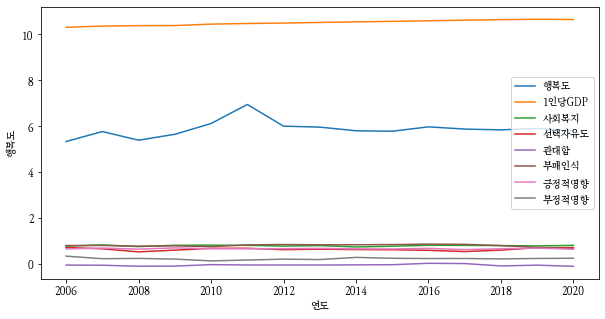

In [138]:
#꺾은선 그래프 그리기
plt.figure(figsize=(10, 5))
sns.lineplot(x='연도', y='행복도', data=koreaDF)
sns.lineplot(x='연도', y='1인당GDP', data=koreaDF)
sns.lineplot(x='연도', y='사회복지', data=koreaDF)
sns.lineplot(x='연도', y='선택자유도', data=koreaDF)
sns.lineplot(x='연도', y='관대함', data=koreaDF)
sns.lineplot(x='연도', y='부패인식', data=koreaDF)
sns.lineplot(x='연도', y='긍정적영향', data=koreaDF)
sns.lineplot(x='연도', y='부정적영향', data=koreaDF)
plt.legend(['행복도', '1인당GDP', '사회복지','선택자유도', '관대함', '부패인식', '긍정적영향', '부정적영향'])

### 2) 2020년 국가별 선택자유도(개인주의적 문화) 비교

In [139]:
#가장 최근 연도의 자료만 존재하는 새로운 데이터 프레임 만들기
latestDF = df[df['연도'] == max(df['연도'])]
latestDF.head()

,국가,연도,행복도,1인당GDP,사회복지,출생시의건강도,선택자유도,관대함,부패인식,긍정적영향,부정적영향
24,Albania,2020-01-01,5.365,9.497,0.710,69.3,0.754,0.007,0.891,0.679,0.265
51,Argentina,2020-01-01,5.901,9.850,0.897,69.2,0.823,-0.122,0.816,0.764,0.342
79,Australia,2020-01-01,7.137,10.760,0.937,74.2,0.905,0.210,0.491,0.769,0.205
92,Austria,2020-01-01,7.213,10.851,0.925,73.6,0.912,0.011,0.464,0.769,0.206
117,Bahrain,2020-01-01,6.173,10.620,0.848,69.7,0.945,0.132,NaN,0.790,0.297


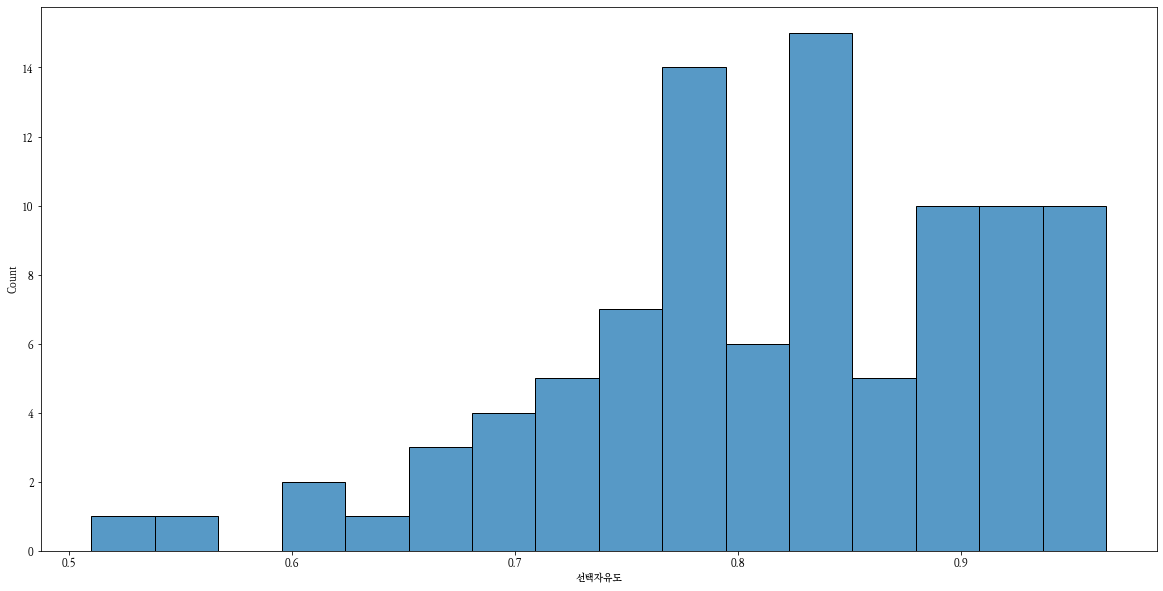

In [140]:
#새로운 데이터프레임 자료를 기반으로 선택자유도를 히스토그램으로 비교하기
sns.histplot(latestDF.선택자유도, bins=16)
plt.show()

### 3) 전세계 행복도 순위

In [142]:
#행복도 순으로 정렬된 새로운 데이터프레임 만들기
sortedDF = latestDF.sort_values(by='행복도', ascending=False)
sortedDF.head()

,국가,연도,행복도,1인당GDP,사회복지,출생시의건강도,선택자유도,관대함,부패인식,긍정적영향,부정적영향
563,Finland,2020-01-01,7.889,10.750,0.962,72.1,0.962,-0.116,0.164,0.744,0.193
731,Iceland,2020-01-01,7.575,10.824,0.983,73.0,0.949,0.160,0.644,0.863,0.172
463,Denmark,2020-01-01,7.515,10.910,0.947,73.0,0.938,0.052,0.214,0.818,0.227
1661,Switzerland,2020-01-01,7.508,11.081,0.946,74.7,0.917,-0.064,0.280,0.769,0.193
1224,Netherlands,2020-01-01,7.504,10.901,0.944,72.5,0.935,0.151,0.281,0.784,0.247


<AxesSubplot:xlabel='국가', ylabel='행복도'>

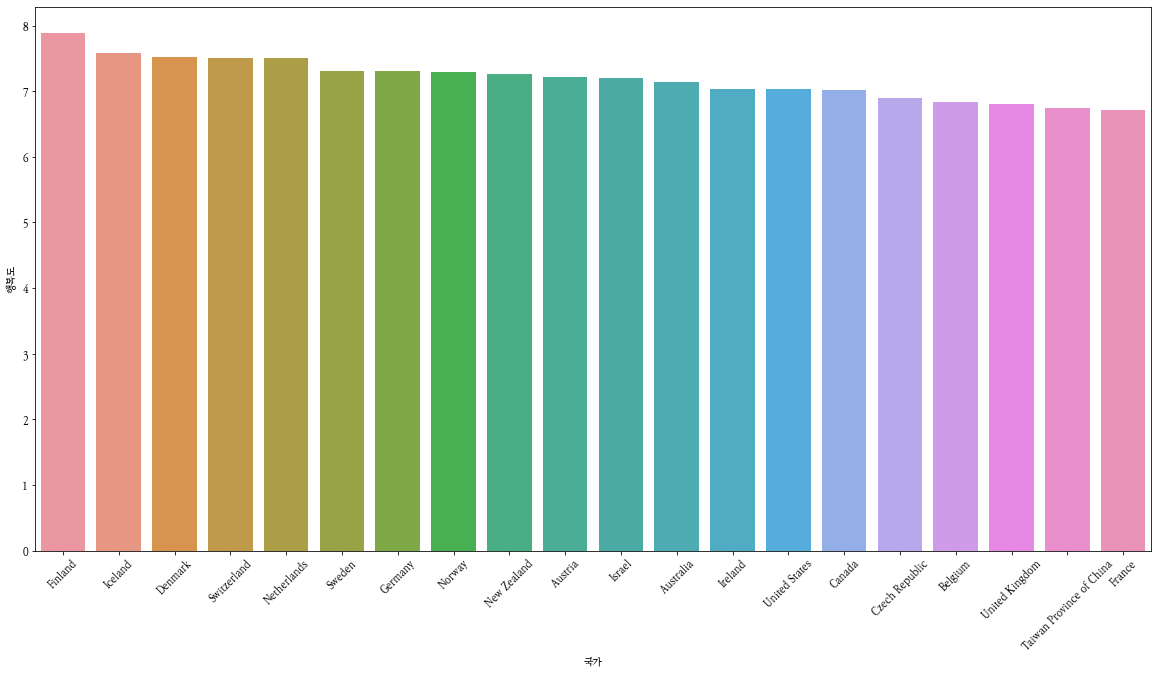

In [143]:
#새로운 데이터프레임을 기반으로 행복도 순위로 2020년 전세계 행복도 순위 보기
plt.xticks(rotation=45)
plt.rcParams['figure.figsize'] = [20, 10] #크기 조절
sns.barplot(x='국가', y='행복도', data=sortedDF.head(20))